In [166]:
import os
import pandas as pd
import numpy as np


In [167]:
# --- Step 1: Define the file path ---
# Folder where the CSV(s) are stored
data_folder = 'data_collection'

# List all files in the data folder
files = os.listdir(data_folder)
print("Files in the data folder:")
print(files)

# Input (1 all or zero) whether all or a specific file should be processed
file_info = input("For all files, press 1, for a specific file, press 0: ")

if file_info == '0':
    # Print all files in the data folder in a numbered list, integer will be used to select the file
    for i, f in enumerate(files):
        print(f"{i}: {f}")

    # Select the file to be processed
    file_index = int(input("Select the file to be processed: "))

    file_name = files[file_index]

elif file_info == '1':
    file_name = 'all'

Files in the data folder:
['FALL_1.csv', 'FALL_2.csv', 'STUMBLE_1.csv', 'WALK_1.csv', 'WALK_2.csv', 'SITTING_1.csv', 'ACTIVITY_1.csv']
0: FALL_1.csv
1: FALL_2.csv
2: STUMBLE_1.csv
3: WALK_1.csv
4: WALK_2.csv
5: SITTING_1.csv
6: ACTIVITY_1.csv


In [168]:
# Load data from the selected file(s)

if file_name == 'all':
    # For loop over file names, save df as the file name without the extension
    # Each file its own dataframe

    # Create an empty dictionary to store the dataframes
    dataframes = {}

    for file in files:
        # Load the data from the file
        data = pd.read_csv(f"{data_folder}/{file}", header=None)

        # Store the data in the dictionary
        dataframes[file] = data

else:
    # Load the data from the selected file
    data = pd.read_csv(f"{data_folder}/{file_name}")

    # Store the data in the dictionary
    dataframes = {file_name: data}

In [169]:
# Print dictionary status
print("Number of dataframes in the dictionary:")
print(len(dataframes))

Number of dataframes in the dictionary:
1


In [170]:
# --- Step 4: Augment the data ---
def augment_row(row, scale):
    """Scales each value's difference from the row average by 'scale' and then re-centers."""
    avg = row.mean()
    return (row - avg) * scale + avg

# Define function to augment the data
def augment_cut(row, steps):
    """Augments the data by cutting the first steps elements and appending steps average values.
    If steps are negative, it deletes the end steps and inserts averages at the beginning."""

    if steps >= 0:
        # Cut the first 'steps' elements
        cut = row[steps:]

        # Calculate the average of the first 'steps' elements
        avg = row[:steps].mean()

        # Append the average to the cut data
        return np.append(cut, np.repeat(avg, steps))
    else:
        # Cut the last 'steps' elements
        cut = row[:steps]

        # Calculate the average of the last 'steps' elements
        avg = row[steps:].mean()

        # Prepend the average to the cut data
        return np.append(np.repeat(avg, -steps), cut)



In [171]:
augment_info = input("Which augment do you want (Scale S / Time Cut C: ")

if augment_info == 'S':
    # Augment all dataframes in the dictionary

    # The scaling factor adjusts the "distance" from the row average.
    # For example, entering 1.1 will increase each deviation by 10%:
    #   if avg = 100 and x = 110 then (110 - 100) * 1.1 + 100 = 11 + 100 = 111.

    scale = float(input("Enter augmentation scaling factor (e.g., 1.1 for 10% upscale, 0.9 for 10% downscale): "))

    append = "_scale_" + str(scale)

    for key in dataframes:
        # Get the dataframe from the dictionary
        df = dataframes[key]

        # Apply the augmentation to all rows in the dataframe
        for i in range(len(df)):
            df.iloc[i] = augment_row(df.iloc[i], scale)

elif augment_info == 'C':

    # Input how many steps the time roll should be, always such that if 10, the first 10 are moved to the end
    time_cut = int(input("How many steps should the time cut be? "))

    append = "_roll_" + str(time_cut)


    for key in dataframes:
        # Get the dataframe from the dictionary
        df = dataframes[key]

        # Apply the augmentation to all rows in the dataframe
        for i in range(len(df)):
            df.iloc[i] = augment_cut(df.iloc[i], time_cut)

/var/folders/6c/p1v3x7qs52vb1vs0sj7k6r4r0000gn/T/ipykernel_59219/2103503343.py:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  row[i] += noise
/var/folders/6c/p1v3x7qs52vb1vs0sj7k6r4r0000gn/T/ipykernel_59219/2103503343.py:45: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  row[i] += noise


In [172]:
# Save all dataframes in the dictionary to new CSV files, same name with '_10%scale' appended
# the 10% scale is the augmentation factor (i.e. it changes the name dynamically)

for key in dataframes:
    # Get the dataframe from the dictionary
    df = dataframes[key]

    # Round to 2 decimal places
    df = df.round(2)
    
    # Save the dataframe to a new CSV file
    df.to_csv(f"{data_folder}/{key[:-4]}{append}.csv", index=False, header=None)

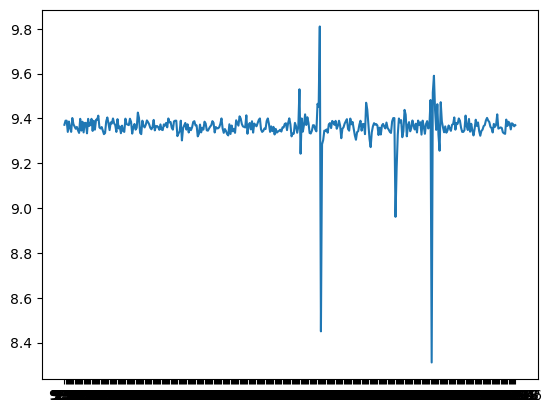

In [173]:
# Plot the first row of the first dataframe if 


import matplotlib.pyplot as plt

if file_name == 'all':
    file_name = files[0]
    
plt.plot(dataframes[file_name].iloc[2])

plt.show()